<H1>PREDICTING LOAN DEFAULTS USING MACHINE LEARNING ALGORITHMS</H1>

<h2>Overview of the data and problem statement</h2>

The dataset has a total of 100,000 rows, each of which contains details about a loan and the customer who received that loan. Information about whether or not a customer defaulted on a loan has been provided for 90,000 of the cases, while this information has not been provided for the remaining 10,000 cases. I used the 90,000 rows for which I have complete information to train and test the machine learning models. I have then used that model to predict whether or not a default occurred for the remaining 10,000 loans.

<b>The columns contained in the dataset are:</b>

• loan_id – The unique ID value for each loan.<br>
• loan_default – Whether or not the customer defaulted on the loan (1 = did default, 0 = did not default). This is the primary outcome variable that you are trying to predict in this project.<br>
• loan_amount – The total amount of money (in U.S. dollars) that was loaned to the customer,<br>
• asset_cost – The total cost (in U.S. dollars) of the item for which the customer sought a loan.<br>
• loan_to_value – The percentage of the total cost of the item that was paid for with the loan.<br>
• customer_age – The age of the customer (in years).<br>
• self_employed – Whether or not the customer is self-employed (1 = self-employed, 0 = not self-employed).<br>
• voter_status_shared – Whether or not the customer voluntarily shared his or her voter status as part of the loan application process (1 = shared, 0 = did not share).<br>
• drivers_license_shared – Whether or not the customer voluntarily shared his or her driver’s license information as part of the loan application process (1 = shared, 0 = did not share).<br>
• passport_shared – Whether or not the customer voluntarily shared his or her passport information as part of the loan application process (1 = shared, 0 = did not share).<br>
• credit_score – The customer’s FICO credit score at the time the loan was disbursed.<br>
• credit_inquiries – The total number of times the customer’s credit has been checked as part of a loan application.<br>
• total_credit_accounts – The total number of credit accounts that the customer has had in his or her lifetime.<br>
• credit_history_length – The total length (in years) that the customer has had a credit history.<br>
• active_credit_accounts – The total number of active credit accounts that the customer had at the time when the loan was disbursed.<br>
• overdue_credit_accounts – The total number of credit accounts that the customer had that were overdue at the time when the loan was disbursed.<br>
• average_credit_account_age – The average age of the customer’s credit accounts (in years).<br>
• total_current_balance – The total amount of money (in U.S. dollars) that the customer currently owes to creditors.<br>
• total_disbursed_loans – The total amount of money (in U.S. dollars) that the customer has received in loans during his or her lifetime.<br>
• recent_loans – The total number of new loans that the customer has had the past six months.<br>
• recent_defaulted_loans – The total number of loans on which the customer defaulted in the past six months.

<H3>Import Libraries</H3>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sklm
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<H3>Load Dataset</H3>

In [2]:
#load the CSV file into a pandas dataframe
df = pd.read_csv('Project 01 - Data.csv', index_col='loan_id')

In [3]:
df.head(10)

,loan_amount,asset_cost,loan_to_value,customer_age,self_employed,voter_status_shared,drivers_license_shared,passport_shared,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
loan_id,,,,,,,,,,,,,,,,,,,,
1,53800,65300,0.824,40,1,1,0,1,762,1,2,4.250,2,0,2.333,2200,67200,1,0,0.0
2,58900,71000,0.830,23,0,0,0,0,680,2,9,1.250,4,0,0.667,26800,52300,3,0,0.0
3,59000,75100,0.786,43,0,0,0,0,771,0,6,1.750,3,0,1.167,129700,172200,2,0,0.0
4,58000,68000,0.853,42,1,0,0,0,692,0,3,0.500,2,0,0.167,250300,700000,2,0,0.0
5,57900,71900,0.805,49,1,1,0,0,657,0,4,14.750,3,0,5.000,301600,327000,1,0,0.0
6,69100,92800,0.745,30,1,0,0,0,617,0,2,2.250,2,0,1.000,100900,114600,1,1,0.0
7,69500,88300,0.787,39,0,0,0,0,712,0,24,5.750,3,0,1.333,28100,164400,0,0,0.0
8,40900,72200,0.566,52,0,0,0,0,684,0,14,9.750,6,0,2.333,606700,524500,1,0,0.0
9,52900,68500,0.772,40,1,0,0,0,510,0,2,1.917,1,1,1.417,24300,25000,0,0,1.0


In [4]:
df.shape

(100000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amount                 100000 non-null  int64  
 1   asset_cost                  100000 non-null  int64  
 2   loan_to_value               100000 non-null  float64
 3   customer_age                100000 non-null  int64  
 4   self_employed               100000 non-null  int64  
 5   voter_status_shared         100000 non-null  int64  
 6   drivers_license_shared      100000 non-null  int64  
 7   passport_shared             100000 non-null  int64  
 8   credit_score                100000 non-null  int64  
 9   credit_inquiries            100000 non-null  int64  
 10  total_credit_accounts       100000 non-null  int64  
 11  credit_history_length       100000 non-null  float64
 12  active_credit_accounts      100000 non-null  int64  
 13  overdue_credit

In [6]:
df.describe()

,loan_amount,asset_cost,loan_to_value,customer_age,self_employed,voter_status_shared,drivers_license_shared,passport_shared,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,90000.000000
mean,54574.544000,7.473938e+04,0.737256,37.311830,0.548330,0.118190,0.025230,0.002840,626.87628,0.339790,5.28932,2.867034,2.238090,0.345740,1.520643,3.617430e+05,4.769300e+05,0.771650,0.214650,0.200300
std,13100.434733,1.873511e+04,0.109982,9.393057,0.497661,0.322835,0.156824,0.053216,143.05150,0.930452,6.72878,2.784724,2.349016,0.781108,1.361291,1.333447e+06,3.560579e+06,1.279032,0.548688,0.400227
min,13700.000000,3.700000e+04,0.124000,21.000000,0.000000,0.000000,0.000000,0.000000,300.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,47300.000000,6.530000e+04,0.681000,30.000000,0.000000,0.000000,0.000000,0.000000,574.00000,0.000000,2.00000,1.000000,1.000000,0.000000,0.667000,3.600000e+03,1.850000e+04,0.000000,0.000000,0.000000
50%,53900.000000,7.010000e+04,0.757000,36.000000,1.000000,0.000000,0.000000,0.000000,673.00000,0.000000,3.00000,2.083000,2.000000,0.000000,1.083000,4.080000e+04,7.390000e+04,0.000000,0.000000,0.000000
75%,60400.000000,7.750000e+04,0.822000,44.000000,1.000000,0.000000,0.000000,0.000000,719.00000,0.000000,7.00000,3.583000,3.000000,0.000000,1.917000,2.331000e+05,3.552000e+05,1.000000,0.000000,0.000000
max,987400.000000,1.329000e+06,0.937000,65.000000,1.000000,1.000000,1.000000,1.000000,850.00000,36.000000,453.00000,39.000000,43.000000,25.000000,24.333000,7.560340e+07,1.000000e+09,28.000000,20.000000,1.000000


<H3>Data Understanding</H3>

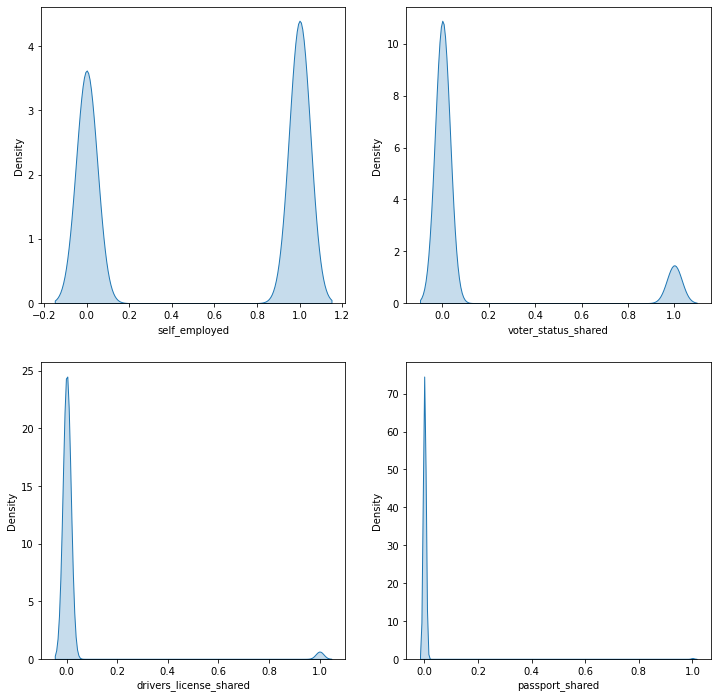

In [7]:
#Visualize the categorial variables (features)
rows, cols = 2, 2
df_col_index = 4
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

Except credit score, other categorical features seems to be imbalanced

In [8]:
#Drop the required columns
df = df.drop(['passport_shared', 'drivers_license_shared', 'voter_status_shared', 'self_employed'], axis = 1)

In [9]:
df.shape

(100000, 16)

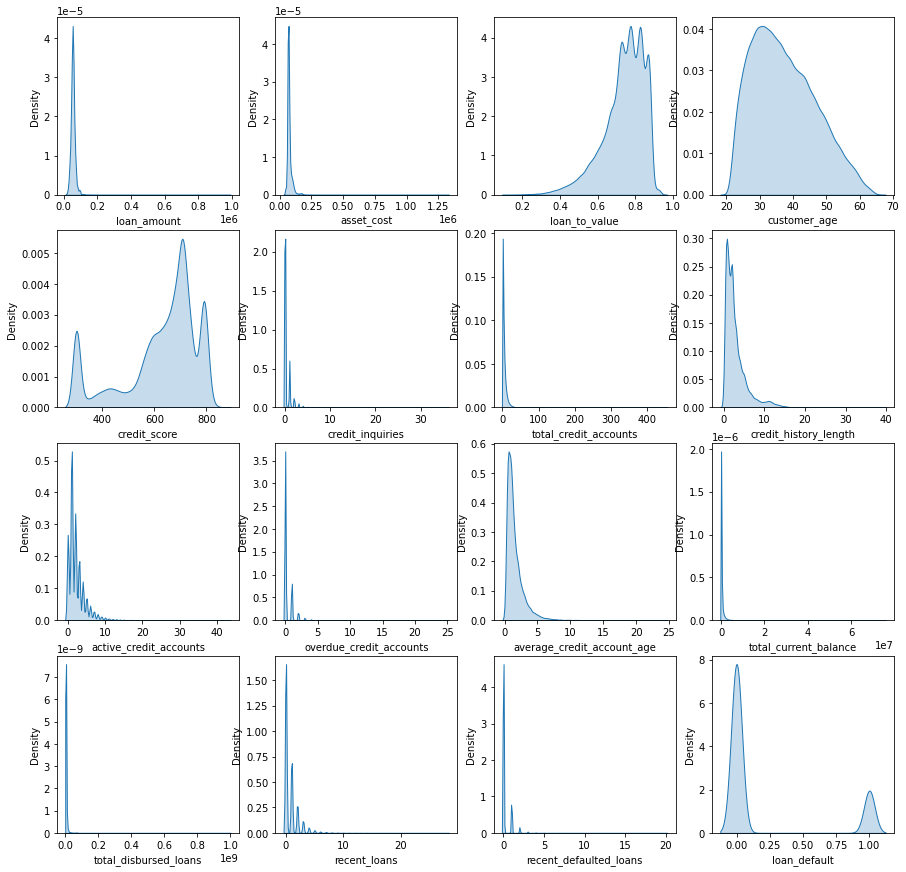

In [10]:
#generate kernel density estimate (KDE) plots for the remaining 16 variables in the dataset
rows, cols = 4, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

Most of the features are observed to be right-skewed, except 'credit_score' and 'loan_to_value'.

<H3>Data Preprocessing</H3>

In [11]:
#Apply natural log transformation to the left-skewed variables in order to make the distribution 'more' normal.

df['loan_amount'] = [math.log(x) for x in df['loan_amount']]
df['asset_cost'] = [math.log(x) for x in df['asset_cost']]
df['customer_age'] = [math.log(x) for x in df['customer_age']]
df['credit_inquiries'] = [math.log(x + 1) for x in df['credit_inquiries']]
df['total_credit_accounts'] = [math.log(x) for x in df['total_credit_accounts']]
df['credit_history_length'] = [math.log(x + 1) for x in df['credit_history_length']]
df['active_credit_accounts'] = [math.log(x + 1) for x in df['active_credit_accounts']]
df['overdue_credit_accounts'] = [math.log(x + 1) for x in df['overdue_credit_accounts']]
df['average_credit_account_age'] = [math.log(x + 1) for x in df['average_credit_account_age']]
df['total_current_balance'] = [math.log(x + 1) for x in df['total_current_balance']]
df['total_disbursed_loans'] = [math.log(x + 1) for x in df['total_disbursed_loans']]
df['recent_loans'] = [math.log(x + 1) for x in df['recent_loans']]
df['recent_defaulted_loans'] = [math.log(x + 1) for x in df['recent_defaulted_loans']]

#Apply exponential transformation for the right-skewed variables
df['loan_to_value'] = [math.exp(x) for x in df['loan_to_value']]
df['credit_score'] = [math.log(x) for x in df['credit_score']] #Exp transformation is outside the range

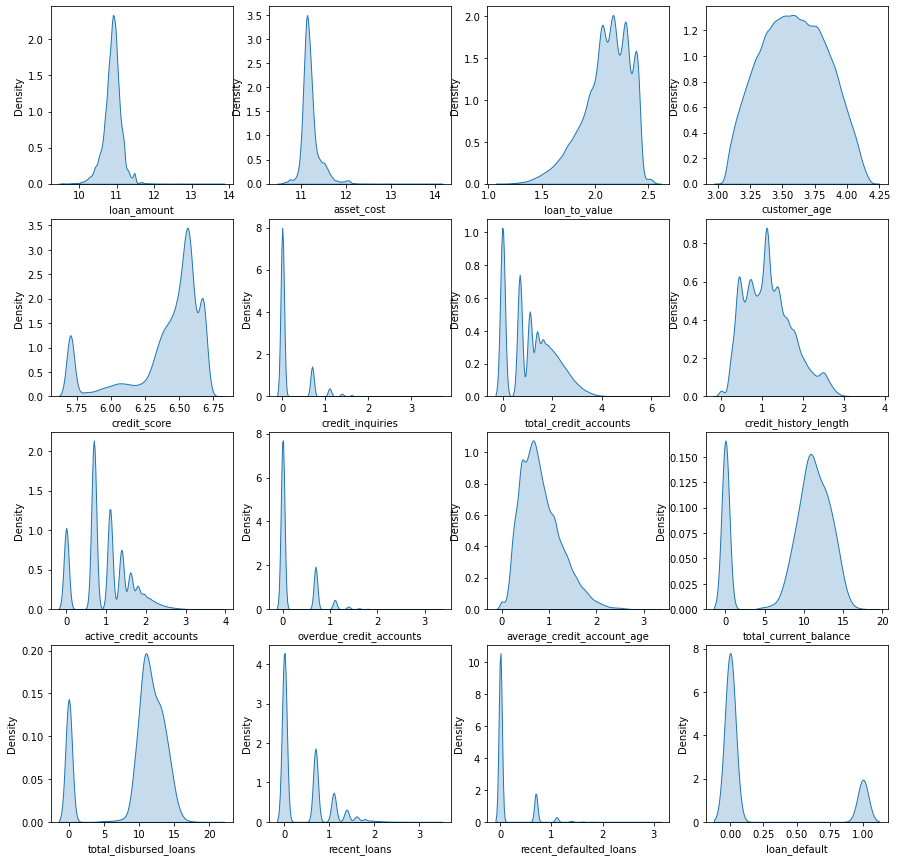

In [12]:
#generate kernel density estimate (KDE) plots for the remaining 16 variables in the dataset after transformation
rows, cols = 4, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amount                 100000 non-null  float64
 1   asset_cost                  100000 non-null  float64
 2   loan_to_value               100000 non-null  float64
 3   customer_age                100000 non-null  float64
 4   credit_score                100000 non-null  float64
 5   credit_inquiries            100000 non-null  float64
 6   total_credit_accounts       100000 non-null  float64
 7   credit_history_length       100000 non-null  float64
 8   active_credit_accounts      100000 non-null  float64
 9   overdue_credit_accounts     100000 non-null  float64
 10  average_credit_account_age  100000 non-null  float64
 11  total_current_balance       100000 non-null  float64
 12  total_disbursed_loans       100000 non-null  float64
 13  recent_loans  

In [14]:
df.describe()

,loan_amount,asset_cost,loan_to_value,customer_age,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,90000.000000
mean,10.880871,11.198919,2.102377,3.587946,6.406941,0.185134,1.197294,1.163456,0.976767,0.204584,0.822115,8.999481,9.844268,0.406458,0.134523,0.200300
std,0.231518,0.201727,0.218547,0.250659,0.278685,0.394907,0.936970,0.586616,0.616382,0.382014,0.425990,4.887987,4.692761,0.528674,0.308197,0.400227
min,9.525151,10.518673,1.132016,3.044522,5.703782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.764266,11.086747,1.975853,3.401197,6.352629,0.000000,0.693147,0.693147,0.693147,0.000000,0.511026,8.188967,9.825580,0.000000,0.000000,0.000000
50%,10.894886,11.157678,2.131871,3.583519,6.511745,0.000000,1.098612,1.125903,1.098612,0.000000,0.733809,10.616462,11.210482,0.000000,0.000000,0.000000
75%,11.008744,11.258033,2.275045,3.784190,6.577861,0.000000,1.945910,1.522354,1.386294,0.000000,1.070556,12.359227,12.780439,0.693147,0.000000,0.000000
max,13.802831,14.099937,2.552313,4.174387,6.745236,3.610918,6.115892,3.688879,3.784190,3.258097,3.232108,18.141012,20.723266,3.367296,3.044522,1.000000


<H3>Exploratory Data Analysis</H3>

<AxesSubplot:>

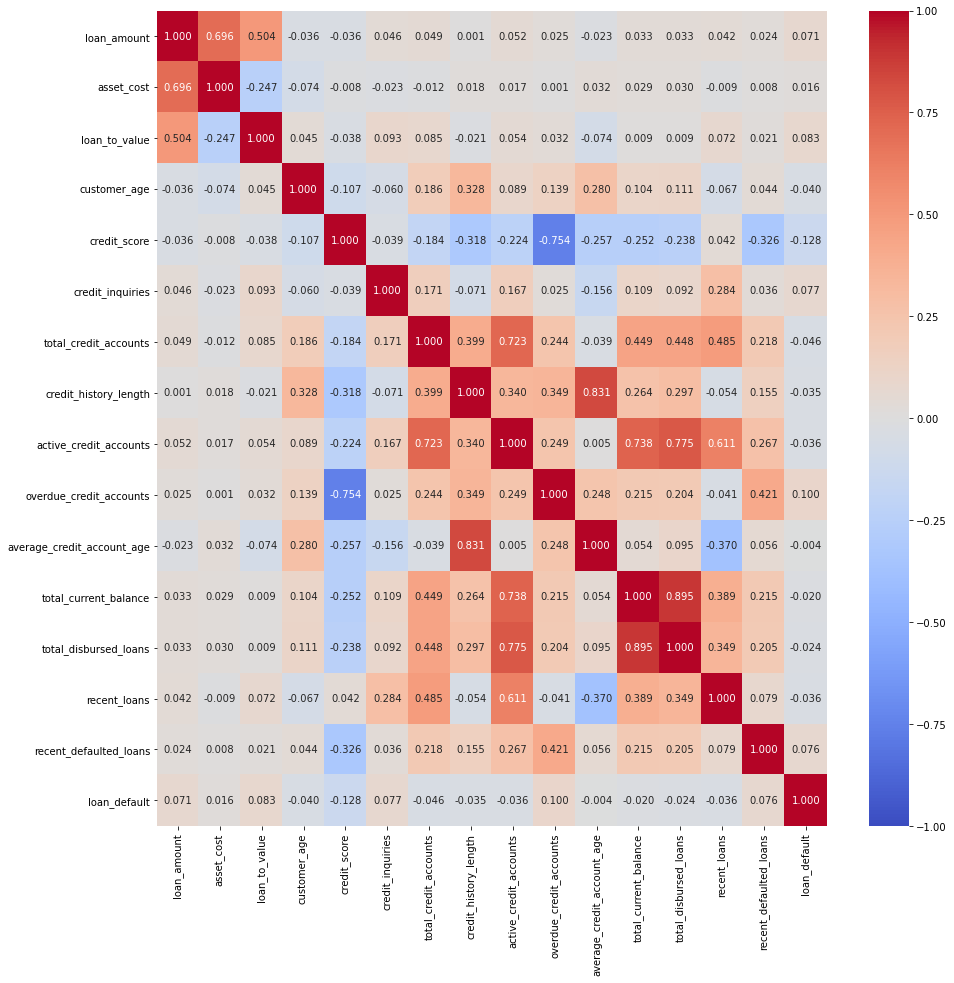

In [15]:
#Plot a correlation matrix heatmap for all features
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

Some of the features are observed to be highly correlated with others.

In [16]:
cols = ['total_disbursed_loans', 'average_credit_account_age']
df = df.drop(columns = cols, axis = 1)

In [17]:
df.shape

(100000, 14)

<H3>Create the validation dataset with the incomplete (missing) labels</H3>

In [18]:
#create a dataframe containing only those rows for which a loan default prediction needs to be made
df_predict = df[pd.isnull(df.loan_default) == True].copy()
#remove all incomplete rows from the 'df' dataframe
df = df[pd.isnull(df.loan_default) == False].copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1 to 90000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amount              90000 non-null  float64
 1   asset_cost               90000 non-null  float64
 2   loan_to_value            90000 non-null  float64
 3   customer_age             90000 non-null  float64
 4   credit_score             90000 non-null  float64
 5   credit_inquiries         90000 non-null  float64
 6   total_credit_accounts    90000 non-null  float64
 7   credit_history_length    90000 non-null  float64
 8   active_credit_accounts   90000 non-null  float64
 9   overdue_credit_accounts  90000 non-null  float64
 10  total_current_balance    90000 non-null  float64
 11  recent_loans             90000 non-null  float64
 12  recent_defaulted_loans   90000 non-null  float64
 13  loan_default             90000 non-null  float64
dtypes: float64(14)
memory 

<H3>Split the data into testing and training data</H3>

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [22]:
#split the data into training and testing sets
#df_train, df_test = train_test_split(df.copy(), test_size=0.2, shuffle=True, random_state=12345)
#predictors = ['loan_amount', 'asset_cost', 'loan_to_value', 'customer_age', 'credit_score', 'credit_inquiries', 'total_credit_accounts', 'credit_history_length', 'active_credit_accounts', 'overdue_credit_accounts', 'total_current_balance', 'recent_loans', 'recent_defaulted_loans']
#df[predictors] = scaler.fit_transform(df[predictors])

In [23]:
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# from sklearn.decomposition import PCA
# kpca = PCA(n_components=5)
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

<H3>Run Machine Learning Classification Models</H3>

<h4>Logistic Regression Classifier</h4>

In [25]:
#train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
#generate predictions, and save them in a new column named "Has_Diabetes_Predicted" in the testing dataframe
#df_test['loan_default_predicted'] = model.predict(df_test[predictors])

#view actual and predicted values for the first 20 women in the testing set
#df_test[['loan_default', 'loan_default_predicted']].tail(20)

y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7991666666666667


<H4>Evaluation Metrics - Logistic</H4>

In [28]:
# #define a function that generates a ROC curve
# def generate_roc_curve(actual, predicted_probabilities):
#     fpr, tpr, _ = roc_curve(actual, predicted_probabilities)
#     auc = roc_auc_score(actual, predicted_probabilities)
#     plt.plot(fpr, tpr, 'b-', lw=2, label='Area Under Curve (AUC): {0:.3f}'.format(auc))
#     plt.plot([0, 1], [0, 1], 'r--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc=4)
#     plt.show()

# #compute predicted probabilities that each woman in the testing set has diabetes
# predicted_probabilities = model.predict_proba(df_test[predictors])[::,1]

# #generate a ROC curve for the logistic regression classifier
# generate_roc_curve(df_test['loan_default'], predicted_probabilities)

In [29]:
#define a function that prints a confusion matrix and other performance metrics
def print_metrics(actual, predicted):
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  total_predictions = tn + fp + fn + tp
  print(' True positive: {} ({:.2f}%)'.format(tp, tp / total_predictions * 100))
  print(' True negative: {} ({:.2f}%)'.format(tn, tn / total_predictions * 100))
  print('False positive: {} ({:.2f}%)'.format(fp, fp / total_predictions * 100))
  print('False negative: {} ({:.2f}%)\n'.format(fn, fn / total_predictions * 100))
  target_names=['loan rejected', 'loan approved']
  print(classification_report(actual, predicted, target_names=target_names, digits=4))

#show the performance of the model on the testing data
#print_metrics(df_test['loan_default'], df_test['loan_default_predicted'])
print_metrics(y_test, y_pred)

 True positive: 41 (0.23%)
 True negative: 14344 (79.69%)
False positive: 51 (0.28%)
False negative: 3564 (19.80%)

               precision    recall  f1-score   support

loan rejected     0.8010    0.9965    0.8881     14395
loan approved     0.4457    0.0114    0.0222      3605

     accuracy                         0.7992     18000
    macro avg     0.6233    0.5039    0.4551     18000
 weighted avg     0.7298    0.7992    0.7147     18000



<H4>CART Classifier</H4>

In [30]:
# y = df['loan_default'].values # Converting target variable to 1-dimensional numpy array or vector
# df.drop(['loan_default'], axis=1, inplace=True)

In [31]:
# X = df.values # Converting dataframe columns to matrix of features (numpy array)

In [32]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    class_weight='balanced', 
                                    max_features='sqrt', 
                                    splitter='random',
                                    min_samples_leaf=2,
                                    min_samples_split=12) # Initializing the model object
classifier.fit(X_train, y_train) # training the model

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=12, splitter='random')

In [34]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'criterion':['gini', 'entropy'],
#                'splitter':['best', 'random'],
#                'max_depth':[3,4,5],
#                'min_samples_split':[2,4,6,8,10,12,14],
#                'min_samples_leaf':[1,2,4,6,8,10,12,14]}]
# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters,
#                            scoring='accuracy',
#                            cv=5,
#                            n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print('Best Accuracy: {:.2f}'.format(best_accuracy * 100))
# print('Best Parameters: ', best_parameters)

<h4>CART Evaluation Metrics</h4>

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11137  3258]
 [ 2285  1320]]


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6920555555555555


In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy: {:.2f}'.format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)

Accuracy: 60.76
Standard Deviation: 7.66 %
Precision: 0.288
Recall: 0.366
F-Measure: 0.323


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80     14395
         1.0       0.29      0.37      0.32      3605

    accuracy                           0.69     18000
   macro avg       0.56      0.57      0.56     18000
weighted avg       0.72      0.69      0.70     18000



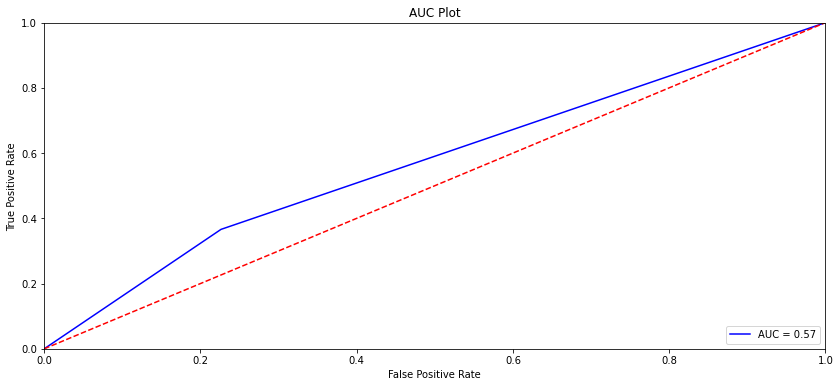

In [40]:
# Fix the code for ROC Curve

import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
# Get the true positive, false positive, and thresholds.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot FPR against TPR
plt.figure(figsize=(14, 6))
plt.title('AUC Plot')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<H4>Random Forest Classifier</H4>

In [41]:
# X = df.values # Converting dataframe columns to matrix of features (numpy array)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, max_depth=5)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14395     0]
 [ 3605     0]]


In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy: {:.2f}'.format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)

import warnings
warnings.filterwarnings('ignore')

Accuracy: 79.97
Standard Deviation: 0.01 %
Precision: 0.000
Recall: 0.000
F-Measure: 0.000


C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print_metrics(y_test, y_pred)

 True positive: 0 (0.00%)
 True negative: 14395 (79.97%)
False positive: 0 (0.00%)
False negative: 3605 (20.03%)

               precision    recall  f1-score   support

loan rejected     0.7997    1.0000    0.8887     14395
loan approved     0.0000    0.0000    0.0000      3605

     accuracy                         0.7997     18000
    macro avg     0.3999    0.5000    0.4444     18000
 weighted avg     0.6396    0.7997    0.7107     18000



K Nearest Neighbor

In [46]:
#train a k-nearest neighbors (KNN) classifier
import sklearn.metrics as metrics
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

#evaluate the performance of the KNN classifier using the test set
#df_test['loan_default_predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
#print_metrics(df_test['loan_default'], df_test['loan_default_predicted'])

KNeighborsClassifier(n_neighbors=11)

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(accuracy_score(y_test, y_pred))

0.7898333333333334


In [49]:
print_metrics(y_test, y_pred)

 True positive: 244 (1.36%)
 True negative: 13973 (77.63%)
False positive: 422 (2.34%)
False negative: 3361 (18.67%)

               precision    recall  f1-score   support

loan rejected     0.8061    0.9707    0.8808     14395
loan approved     0.3664    0.0677    0.1143      3605

     accuracy                         0.7898     18000
    macro avg     0.5862    0.5192    0.4975     18000
 weighted avg     0.7180    0.7898    0.7273     18000



In [50]:
# #generate predictions, and save them in a new column named "Has_Diabetes_Predicted" in the testing dataframe
# df_test['loan_default_predicted'] = model.predict(df_test[predictors])

# #view actual and predicted values for the first 20 women in the testing set
# df_test[['loan_default', 'loan_default_predicted']].tail(20)

XGBoost

In [51]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[11:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'learning_rate':[0.1,0.2,0.3],
#                'n_estimators':[100, 200, 300],
#                'max_depth':[3,4,5],
#                'reg_alpha':[0, 1, 100]}]
# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters,
#                            scoring='accuracy',
#                            cv=5,
#                            n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print('Best Accuracy: {:.2f}'.format(best_accuracy * 100))
# print('Best Parameters: ', best_parameters)

In [53]:
# from catboost import CatBoostClassifier
# classifier = CatBoostClassifier(n_estimators=300, depth=5)
# classifier.fit(X_train, y_train)

In [54]:
# from lightgbm import LGBMClassifier
# classifier = LGBMClassifier(n_estimators=300, max_depth=5)
# classifier.fit(X_train, y_train)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7958333333333333


In [57]:
print_metrics(y_test, y_pred)

 True positive: 139 (0.77%)
 True negative: 14186 (78.81%)
False positive: 209 (1.16%)
False negative: 3466 (19.26%)

               precision    recall  f1-score   support

loan rejected     0.8036    0.9855    0.8853     14395
loan approved     0.3994    0.0386    0.0703      3605

     accuracy                         0.7958     18000
    macro avg     0.6015    0.5120    0.4778     18000
 weighted avg     0.7227    0.7958    0.7221     18000



In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14186   209]
 [ 3466   139]]


In [59]:
results = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
new_dataset = pd.DataFrame(results, columns=['True', 'Predicted'])
new_dataset.head(50)

,True,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,0.0


Artificial Neural Network

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

def build_model():
    classifier = tf.keras.models.Sequential()
    classifier.add(tf.keras.layers.Dense(8, activation='relu'))
    classifier.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

Using TensorFlow backend.


In [61]:
classifier = build_model()
classifier.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
72000/72000 [==============================] - 1s 12us/sample - loss: 0.4936 - acc: 0.7951
Epoch 2/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4811 - acc: 0.7996
Epoch 3/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4790 - acc: 0.7997
Epoch 4/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4779 - acc: 0.7998
Epoch 5/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4776 - acc: 0.79980s - loss: 0.4777 - acc: 0.7
Epoch 6/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4771 - acc: 0.7997
Epoch 7/30
72000/72000 [==============================] - 1s 11us/sample - loss: 0.4768 - acc: 0.7998
Epoch 8/30
72000/72000 [======================

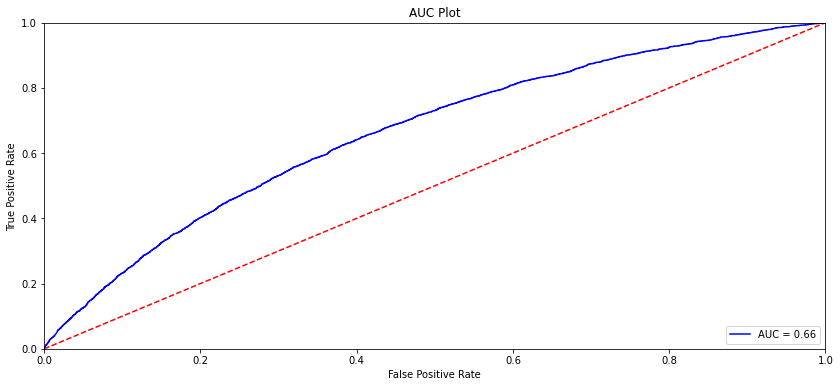

In [63]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
y_pred = classifier.predict(X_test).ravel()
# Get the true positive, false positive, and thresholds.
fpr_keras, tpr_keras, thresholds = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

# Plot FPR against TPR
plt.figure(figsize=(14, 6))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('AUC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [64]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.3
y_pred = y_pred.reshape(len(y_pred))

In [65]:
from sklearn.metrics import accuracy_score
print('{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

74.98%


In [66]:
print_metrics(y_test, y_pred)

 True positive: 1092 (6.07%)
 True negative: 12405 (68.92%)
False positive: 1990 (11.06%)
False negative: 2513 (13.96%)

               precision    recall  f1-score   support

loan rejected     0.8315    0.8618    0.8464     14395
loan approved     0.3543    0.3029    0.3266      3605

     accuracy                         0.7498     18000
    macro avg     0.5929    0.5823    0.5865     18000
 weighted avg     0.7360    0.7498    0.7423     18000



In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12405  1990]
 [ 2513  1092]]


In [68]:
results = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
new_dataset = pd.DataFrame(results, columns=['True', 'Predicted'])
new_dataset.head(50)

,True,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,1.0,1.0
9,1.0,0.0


Predicting 10000 Instances Without Labels

In [69]:
df_predict.drop('loan_default', axis=1, inplace=True)

In [70]:
loan_default = classifier.predict(scaler.transform(df_predict))
loan_default = loan_default > 0.3
loan_default = loan_default.reshape(len(loan_default))

In [71]:
loan_default = 1 * loan_default

In [72]:
df_predict['loan_default'] = loan_default

In [73]:
df_predict.head(30)

,loan_amount,asset_cost,loan_to_value,customer_age,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,total_current_balance,recent_loans,recent_defaulted_loans,loan_default
loan_id,,,,,,,,,,,,,,
90001,11.061940,11.439279,1.985757,3.367296,6.595781,0.000000,0.000000,0.733809,0.693147,0.000000,0.000000,0.000000,0.000000,0
90002,10.898589,11.194097,2.104336,3.526361,6.122493,0.000000,1.098612,2.003775,1.386294,0.693147,12.589296,0.693147,0.693147,0
90003,10.855145,11.042922,2.291027,3.401197,6.335054,0.000000,1.098612,1.658228,1.098612,0.693147,10.868587,0.693147,0.693147,1
90004,11.033275,11.164785,2.403678,3.828641,6.562444,0.000000,0.000000,0.405465,0.693147,0.000000,8.101981,0.000000,0.000000,0
90005,10.555813,11.077516,1.811219,3.688879,5.703782,0.000000,1.386294,1.673914,1.098612,1.098612,12.481433,0.000000,0.000000,0
90006,11.058795,11.401994,2.031958,3.713572,6.391917,0.000000,2.890372,1.299374,1.945910,0.000000,13.196359,0.693147,0.000000,0
90007,10.893029,11.071315,2.309428,3.218876,6.670766,0.000000,0.000000,0.948952,0.000000,0.000000,0.000000,0.000000,0.693147,1
90008,10.902280,11.115429,2.243417,3.637586,6.605298,1.098612,0.000000,1.011601,0.693147,0.000000,13.427789,0.000000,0.000000,0
90009,10.973357,11.174652,2.265963,3.295837,6.670766,0.000000,0.000000,0.882527,0.000000,0.000000,0.000000,0.000000,0.000000,0


<h3>Conclusion</h3>

- Comparing all the models above, Artificial Neural Network (ANN) has the best evaluation metrics scores.

- On a business case perspective, it is more important to "accurately" predict the number of customers who are likely to default the loan. As a result, I have evaluated recall, f1 score, and confusion metrics over accuracy.